In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(grid=False)

# set figure size
plt.rcParams["figure.figsize"] = (10,8)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

The end result of this exercise should be a file named prepare.py.

Using your store items data:

In [34]:
sales = pd.read_csv('sales.csv',index_col=0)
stores = pd.read_csv('stores.csv', index_col=0)
items = pd.read_csv('items.csv', index_col=0)

In [22]:
sales

,item,sale_amount,sale_date,sale_id,store
0,1,13.00,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,11.00,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
2,1,14.00,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
3,1,13.00,"Fri, 04 Jan 2013 00:00:00 GMT",4,1
4,1,10.00,"Sat, 05 Jan 2013 00:00:00 GMT",5,1
...,...,...,...,...,...
912995,50,63.00,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10
912996,50,59.00,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10
912997,50,74.00,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10
912998,50,62.00,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10


In [35]:
store_items = sales.merge(stores, left_on='store',right_on='store_id')
store_items = store_items.merge(items, left_on='item', right_on='item_id')
store_items = store_items.drop(columns=['item','store'])
store_items.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.00,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.00,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.00,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.00,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.00,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 1. Convert date column to datetime format.

In [36]:
store_items.sale_date = store_items.sale_date.str.replace('GMT','')

In [37]:
store_items.sale_date = store_items.sale_date.str.slice(start=4)

In [42]:
store_items.sale_date = pd.to_datetime(store_items.sale_date)
store_items.sale_date

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

### 2. Plot the distribution of sale_amount and item_price.

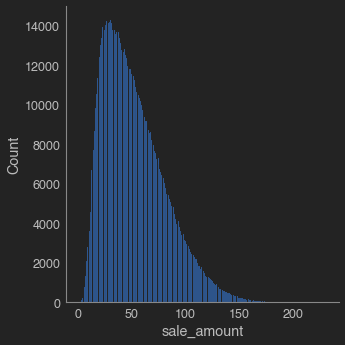

In [43]:
sns.displot(data=store_items.sale_amount)

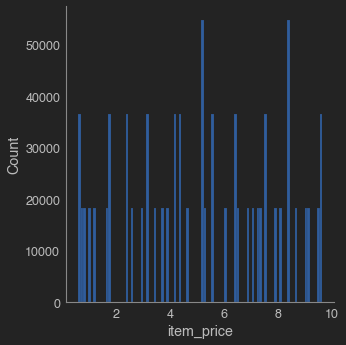

In [44]:
sns.displot(data=store_items.item_price)

### 3. Set the index to be the datetime variable.

In [45]:
store_items = store_items.set_index('sale_date').sort_index()
store_items

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,13.00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,26.00,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,27.00,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,54.00,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,35.00,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,21.00,619014,735 SW Military Dr,San Antonio,9,TX,78221,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31,32.00,620840,8503 NW Military Hwy,San Antonio,10,TX,78231,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31,55.00,622666,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066


In [47]:
store_items.groupby('store_id').resample('D').sale_amount.sum().unstack(0)

store_id,1,2,3,4,5,6,7,8,9,10
sale_date,,,,,,,,,,
2013-01-01,1316.00,1742.00,1588.00,1423.00,1032.00,1099.00,964.00,1628.00,1383.00,1521.00
2013-01-02,1264.00,1808.00,1538.00,1432.00,997.00,1023.00,944.00,1687.00,1455.00,1530.00
2013-01-03,1305.00,1887.00,1635.00,1534.00,1130.00,1149.00,966.00,1736.00,1492.00,1654.00
2013-01-04,1452.00,1983.00,1741.00,1685.00,1258.00,1201.00,1040.00,1966.00,1612.00,1739.00
2013-01-05,1499.00,2087.00,1887.00,1649.00,1154.00,1286.00,1131.00,2005.00,1698.00,1841.00
...,...,...,...,...,...,...,...,...,...,...
2017-12-27,1837.00,2624.00,2365.00,2176.00,1552.00,1560.00,1471.00,2468.00,2104.00,2221.00
2017-12-28,1951.00,2839.00,2479.00,2306.00,1696.00,1707.00,1509.00,2660.00,2309.00,2429.00
2017-12-29,2116.00,3025.00,2646.00,2460.00,1774.00,1737.00,1689.00,2923.00,2478.00,2687.00


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [49]:
store_items['month'] = store_items.index.month_name()
store_items.month.head(1)

sale_date
2013-01-01    January
Name: month, dtype: object

In [50]:
store_items['day_of_week'] = store_items.index.day_name()
store_items.day_of_week.head(1)

sale_date
2013-01-01    Tuesday
Name: day_of_week, dtype: object

In [51]:
store_items.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-01,26.00,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
2013-01-01,27.00,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday
2013-01-01,54.00,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
2013-01-01,35.00,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [52]:
store_items['sales_total'] = store_items.sale_amount * store_items.item_price
store_items.sales_total

sale_date
2013-01-01    10.92
2013-01-01   218.40
2013-01-01   125.55
2013-01-01   453.60
2013-01-01   294.00
              ...  
2017-12-31    87.57
2017-12-31   133.44
2017-12-31   285.45
2017-12-31   652.00
2017-12-31   426.40
Name: sales_total, Length: 913000, dtype: float64

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [61]:
#
def get_sales():
    sales = pd.read_csv('sales.csv',index_col=0)
    stores = pd.read_csv('stores.csv', index_col=0)
    items = pd.read_csv('items.csv', index_col=0)
    
    store_items = sales.merge(stores, left_on='store',right_on='store_id')
    store_items = store_items.merge(items, left_on='item', right_on='item_id')
    store_items = store_items.drop(columns=['item','store'])
    
    store_items.sale_date = store_items.sale_date.str.replace('GMT','')
    store_items.sale_date = store_items.sale_date.str.slice(start=4)
    store_items.sale_date = pd.to_datetime(store_items.sale_date)
    
    store_items = store_items.set_index('sale_date').sort_index()
    
    store_items['month'] = store_items.index.month_name()
    store_items['day_of_week'] = store_items.index.day_name()
    store_items['sales_total'] = store_items.sale_amount * store_items.item_price
    
    return store_items

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

### 1. Convert date column to datetime format.

In [53]:
germany = pd.read_csv('opsd_germany_daily.csv')
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18,nan,nan,nan
1,2006-01-02,1380.52,nan,nan,nan
2,2006-01-03,1442.53,nan,nan,nan
3,2006-01-04,1457.22,nan,nan,nan
4,2006-01-05,1477.13,nan,nan,nan


In [54]:
germany.Date = pd.to_datetime(germany.Date)
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18,nan,nan,nan
1,2006-01-02,1380.52,nan,nan,nan
2,2006-01-03,1442.53,nan,nan,nan
3,2006-01-04,1457.22,nan,nan,nan
4,2006-01-05,1477.13,nan,nan,nan


### 2. Plot the distribution of each of your variables.

array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Wind+Solar'}>]], dtype=object)

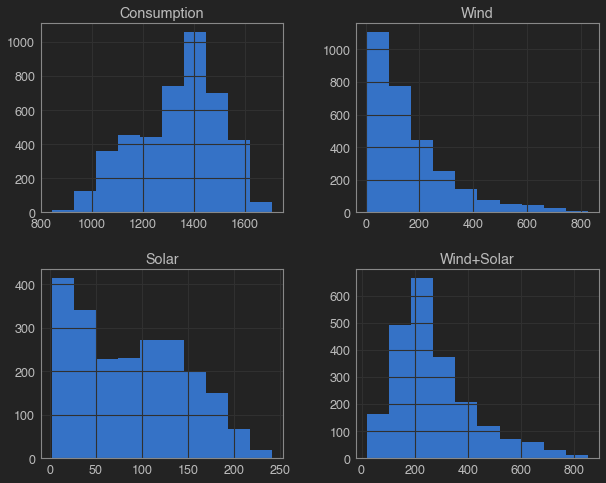

In [55]:
germany.hist()

### 3. Set the index to be the datetime variable.

In [56]:
germany = germany.set_index('Date').sort_index()
germany

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18,nan,nan,nan
2006-01-02,1380.52,nan,nan,nan
2006-01-03,1442.53,nan,nan,nan
2006-01-04,1457.22,nan,nan,nan
2006-01-05,1477.13,nan,nan,nan
...,...,...,...,...
2017-12-27,1263.94,394.51,16.53,411.04
2017-12-28,1299.86,506.42,14.16,520.59
2017-12-29,1295.09,584.28,29.85,614.13


### 4. Add a month and a year column to your dataframe.

In [58]:
germany['month'] = germany.index.month_name()
germany['year'] = germany.index.year
germany.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18,nan,nan,nan,January,2006
2006-01-02,1380.52,nan,nan,nan,January,2006
2006-01-03,1442.53,nan,nan,nan,January,2006
2006-01-04,1457.22,nan,nan,nan,January,2006
2006-01-05,1477.13,nan,nan,nan,January,2006


### 5. Fill any missing values.

In [60]:
germany_filled = germany.fillna(germany.mean())
germany_filled

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18,164.81,89.26,272.66,January,2006
2006-01-02,1380.52,164.81,89.26,272.66,January,2006
2006-01-03,1442.53,164.81,89.26,272.66,January,2006
2006-01-04,1457.22,164.81,89.26,272.66,January,2006
2006-01-05,1477.13,164.81,89.26,272.66,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94,394.51,16.53,411.04,December,2017
2017-12-28,1299.86,506.42,14.16,520.59,December,2017
2017-12-29,1295.09,584.28,29.85,614.13,December,2017


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [62]:
def get_germany():
    
    germany = pd.read_csv('opsd_germany_daily.csv')
    germany.Date = pd.to_datetime(germany.Date)
    
    germany = germany.set_index('Date').sort_index()
    germany['month'] = germany.index.month_name()     
    germany['year'] = germany.index.year
    germany_filled = germany.fillna(germany.mean())
    
    return germany_filled